### Prediction of price for second hand cars using `Regression`

#### Imports

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanAbsoluteError, MeanSquaredError, Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError, Accuracy
import numpy as np

#### Read Data

In [2]:
data = pd.read_csv("SecondHandCarDataSet.csv")
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


#### Data Processing

In [19]:
tensor_data = tf.constant(data)
tensor_data = tf.random.shuffle(tensor_data)

In [4]:
X = tensor_data[:, 3:-1]
Y = tensor_data[:,-1]
Y = tf.expand_dims(Y,axis=-1)

In [5]:
TRAIN_RATIO = 0.8
TEST_RATIO = 0.1
VALIDATION_RATIO = 0.1
DATASET_SIZE = len(data)

In [6]:
#Training Data
x_train=X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train=Y[:int(DATASET_SIZE*TRAIN_RATIO)]

#Testing Data
x_test = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+TEST_RATIO))]
y_test = Y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+TEST_RATIO))]

#Validation Data
x_validate = X[int(DATASET_SIZE*(TRAIN_RATIO+TEST_RATIO)):]
y_validate = Y[int(DATASET_SIZE*(TRAIN_RATIO+TEST_RATIO)):]

In [7]:
normalizer = Normalization()
normalizer.adapt(x_train)

#### Creating a model

In [8]:
model = tf.keras.Sequential(
    [
        InputLayer(shape=(8,)),
        normalizer,
        Dense (128, activation='relu') ,
        Dense (128, activation = 'relu') ,
        Dense (128, activation = 'relu') ,
        Dense (1) ,
    ]
)
model. summary ()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,322 (134.07 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 17 (72.00 B)

In [9]:
model.compile(
    optimizer= Adam(learning_rate=0.1),
    loss = MeanAbsoluteError(),
    metrics= [RootMeanSquaredError()]
)

In [10]:
history = model.fit(x_train,y_train,validation_data=(x_validate,y_validate),epochs=100,verbose=1)

Epoch 1/100


2024-03-21 01:19:20.685828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 220773.6406 - root_mean_squared_error: 263255.9688 - val_loss: 45501.5938 - val_root_mean_squared_error: 57773.7305
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 65714.0078 - root_mean_squared_error: 177644.0938 - val_loss: 116107.0391 - val_root_mean_squared_error: 127372.8281
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 172103.9688 - root_mean_squared_error: 193650.1562 - val_loss: 41330.7617 - val_root_mean_squared_error: 50720.0000
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 88564.9688 - root_mean_squared_error: 283606.3438 - val_loss: 36543.7695 - val_root_mean_squared_error: 46649.8945
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 61530.6172 - root_mean_squared_error: 147430.1875 - val_loss: 76031.3828 - val_root_mean_squared_error: 89538.9297
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 58330.4805 - root_mean_squared_error: 72541.5938 - val_loss: 40888.4766 - v

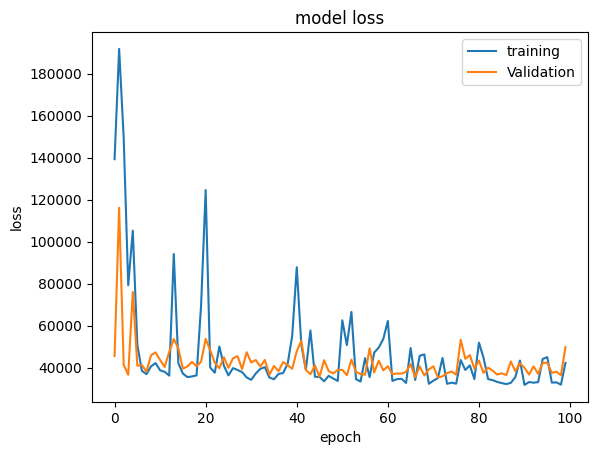

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training','Validation'])
plt.show()

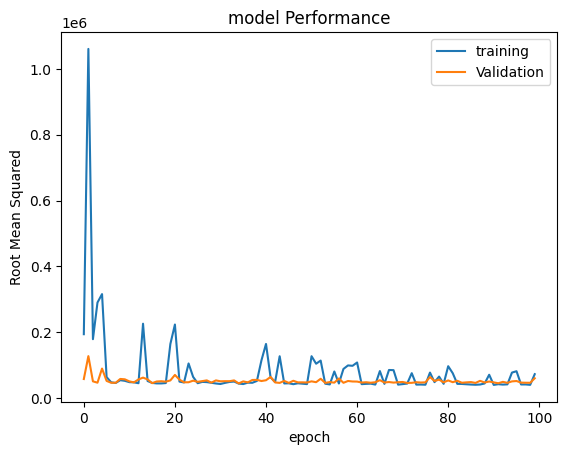

In [12]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model Performance')
plt.ylabel('Root Mean Squared')
plt.xlabel('epoch')
plt.legend(['training','Validation'])
plt.show()

In [13]:
 model.evaluate(x_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 52823.9570 - root_mean_squared_error: 64308.1562


[50333.61328125, 62563.109375]

In [14]:
model.predict(tf.expand_dims(x_test[0], axis = 0 ))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[383165.06]], dtype=float32)

In [15]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([459095.])>

In [16]:
y_true = list(y_test[:,0] .numpy())

In [17]:
y_pred = list(model. predict(x_test) [:,0])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


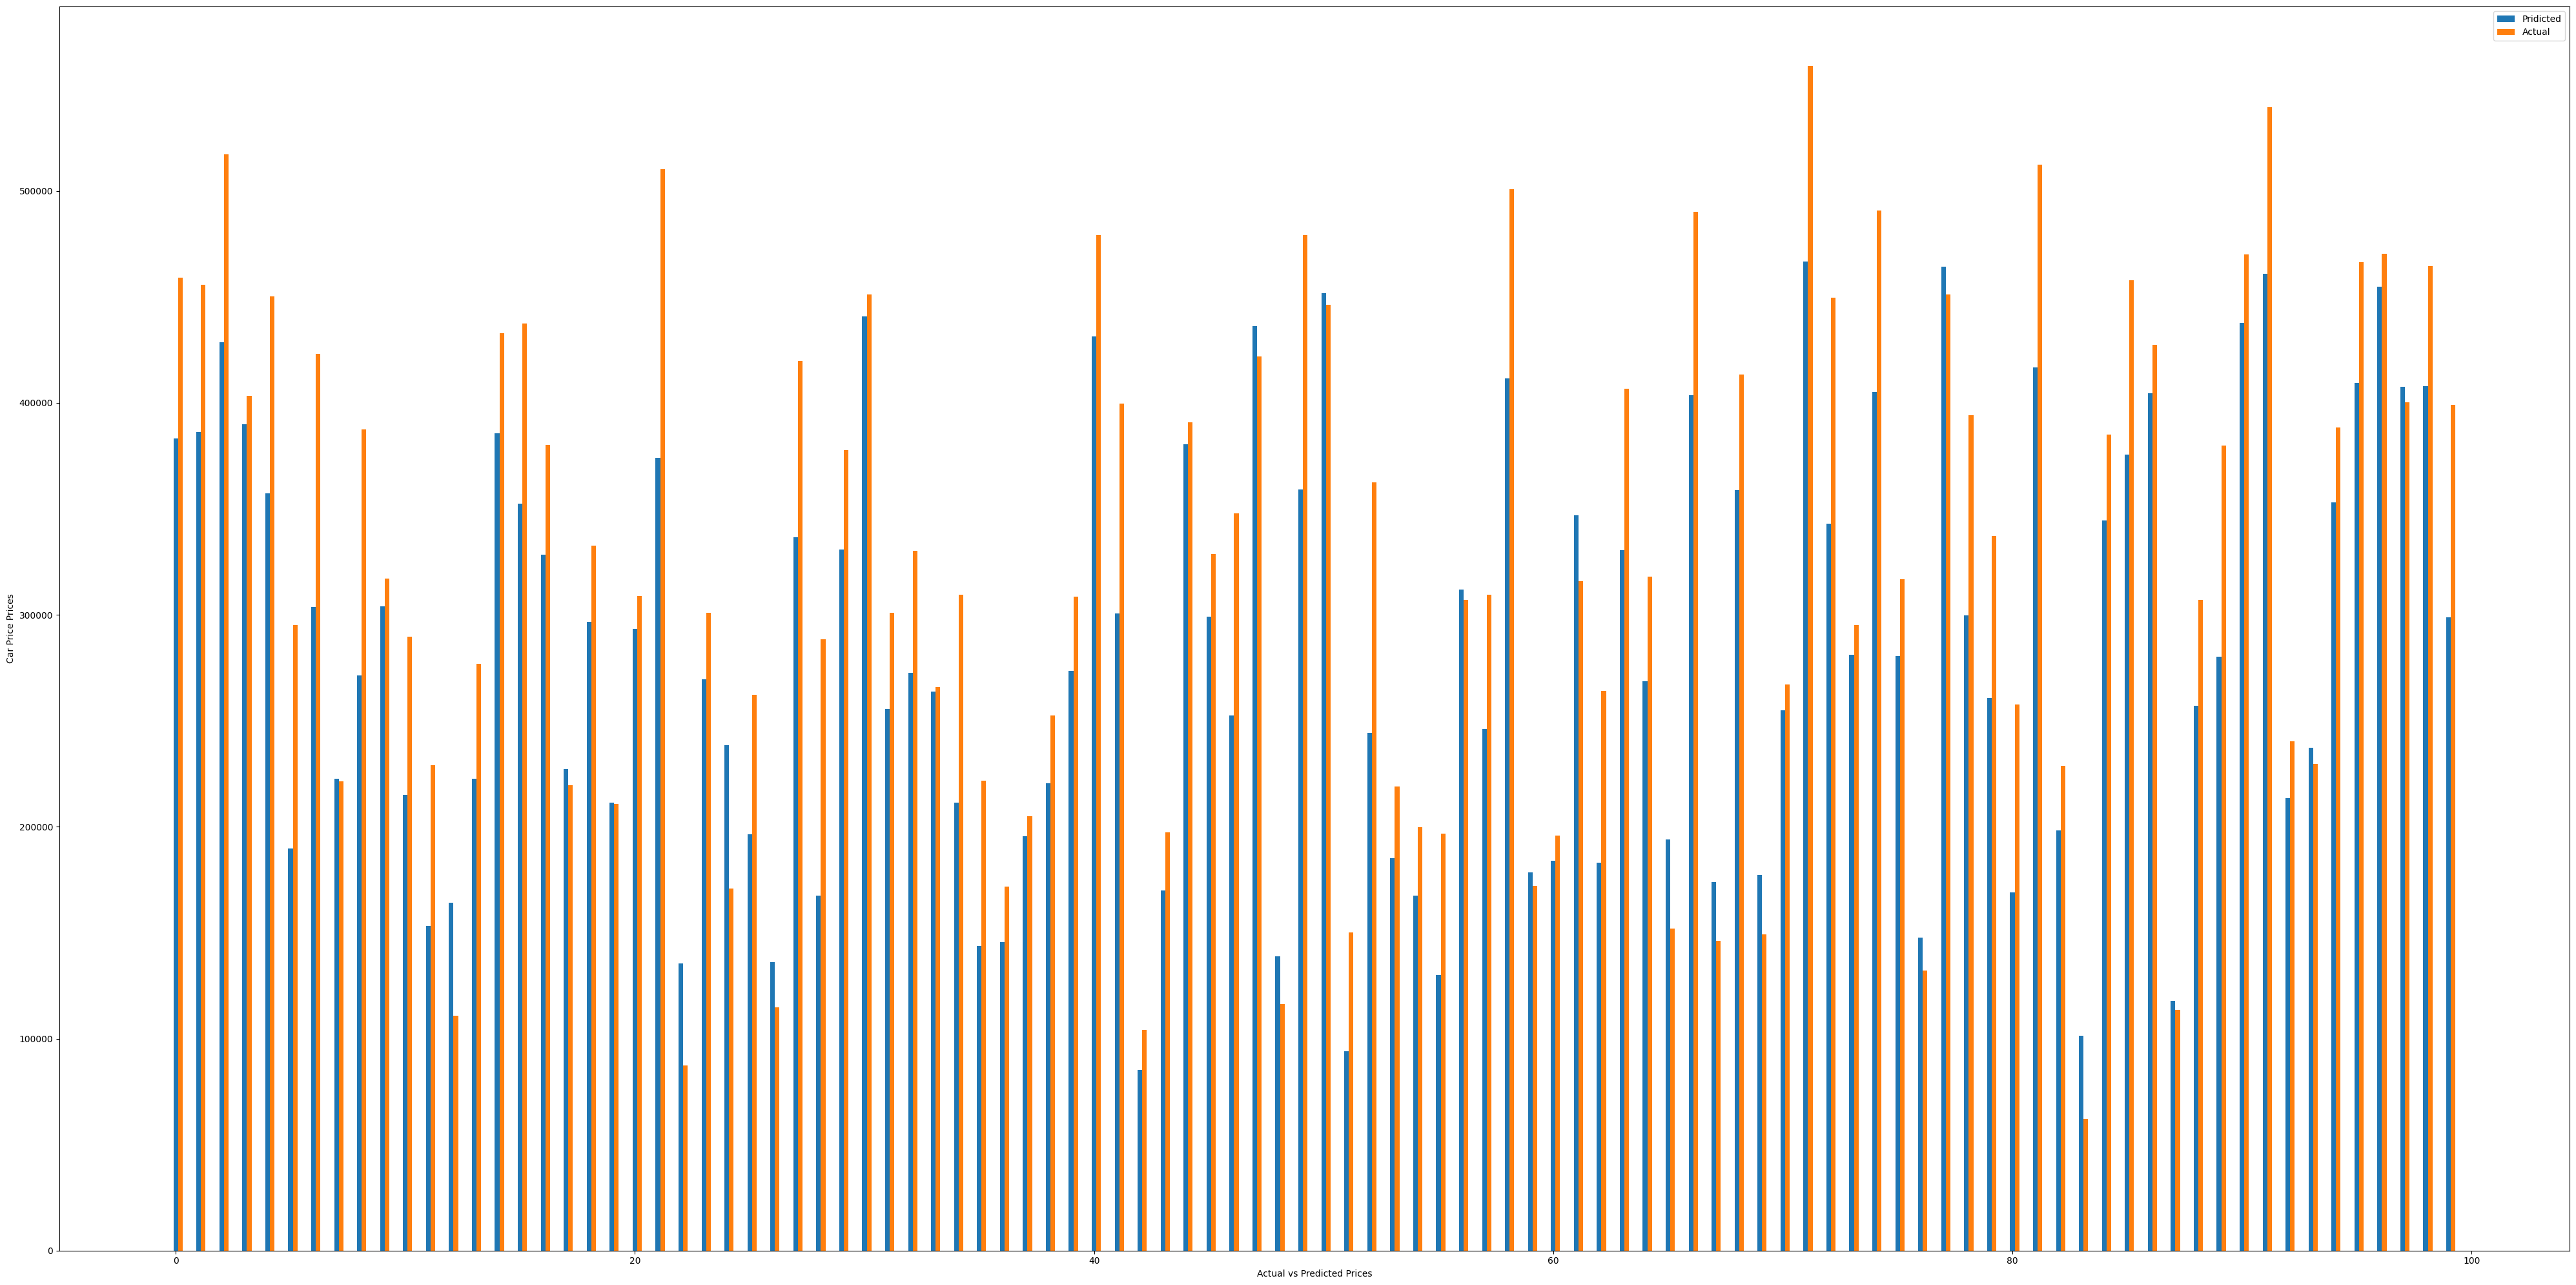

In [18]:
ind = np.arange (100)
plt. figure(figsize=(40,20))
width = 0.2
plt.bar(ind, y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, y_true, width, label='Actual Car Price')
plt.xlabel('Actual vs Predicted Prices')
plt.ylabel( 'Car Price Prices')
plt.legend(['Pridicted','Actual'])
plt.tight_layout()
plt.show()